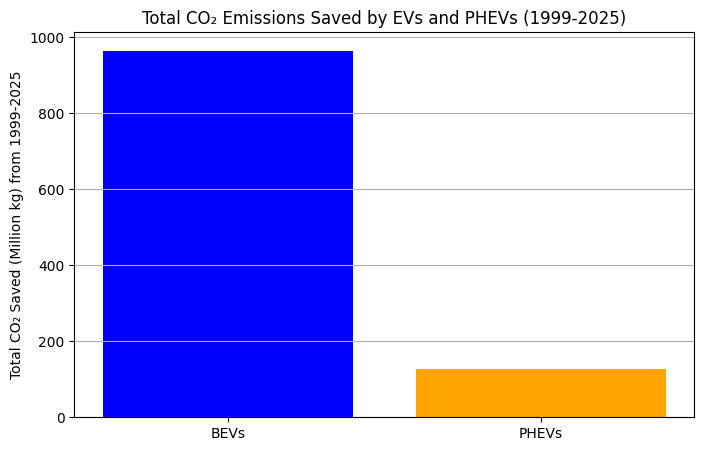

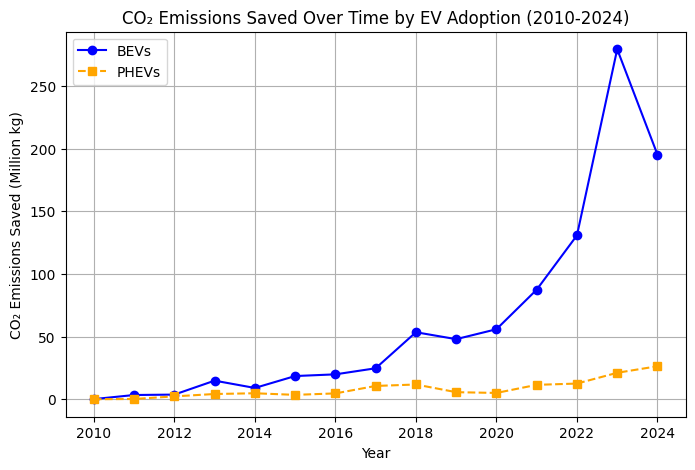

Total CO₂ Saved from 1999-2025:
BEVs: 964.46 million kg
PHEVs: 127.52 million kg


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset
file_path = "/content/Electric_Vehicle_Population_Data.csv"  # Update if needed
df = pd.read_csv(file_path)

# Select Relevant Columns for Analysis
required_columns = ["Model Year", "Electric Vehicle Type"]
df = df[required_columns].dropna()

# Define Constants for CO₂ Savings Calculation
average_gas_car_emissions = 0.404  # kg of CO₂ per mile
average_miles_per_year = 13476  # Updated mileage
phev_gas_usage_factor = 0.5  # PHEVs use 50% gas

# Count EVs by Year and Type
ev_counts = df.groupby(["Model Year", "Electric Vehicle Type"]).size().unstack(fill_value=0)

# Extract BEV and PHEV counts per year
ev_counts["BEVs"] = ev_counts.get("Battery Electric Vehicle (BEV)", 0)
ev_counts["PHEVs"] = ev_counts.get("Plug-in Hybrid Electric Vehicle (PHEV)", 0)

# Calculate Yearly CO₂ Savings
ev_counts["CO₂ Saved BEVs (kg)"] = ev_counts["BEVs"] * average_miles_per_year * average_gas_car_emissions
ev_counts["CO₂ Saved PHEVs (kg)"] = ev_counts["PHEVs"] * average_miles_per_year * average_gas_car_emissions * phev_gas_usage_factor

# Convert to Million kg
ev_counts["CO₂ Saved BEVs (Million kg)"] = ev_counts["CO₂ Saved BEVs (kg)"] / 1e6
ev_counts["CO₂ Saved PHEVs (Million kg)"] = ev_counts["CO₂ Saved PHEVs (kg)"] / 1e6

# Compute Total CO₂ Savings from 1999 to 2025 in Million kg
total_co2_saved_bevs = ev_counts["CO₂ Saved BEVs (Million kg)"].sum()
total_co2_saved_phevs = ev_counts["CO₂ Saved PHEVs (Million kg)"].sum()

# 📊 Bar Chart: Total CO₂ Saved from 1999 to 2025 (Million kg)
plt.figure(figsize=(8, 5))
plt.bar(["BEVs", "PHEVs"], [total_co2_saved_bevs, total_co2_saved_phevs], color=["blue", "orange"])
plt.ylabel("Total CO₂ Saved (Million kg) from 1999-2025")
plt.title("Total CO₂ Emissions Saved by EVs and PHEVs (1999-2025)")
plt.grid(axis="y")
plt.show()

# 📈 Line Chart: CO₂ Savings Trend from 2010 to 2024 (EXCLUDES 2025)
co2_savings_bev_yearly = ev_counts.loc[2010:2024, "CO₂ Saved BEVs (Million kg)"]
co2_savings_phev_yearly = ev_counts.loc[2010:2024, "CO₂ Saved PHEVs (Million kg)"]

plt.figure(figsize=(8, 5))
plt.plot(co2_savings_bev_yearly.index, co2_savings_bev_yearly.values, marker="o", linestyle="-", color="blue", label="BEVs")
plt.plot(co2_savings_phev_yearly.index, co2_savings_phev_yearly.values, marker="s", linestyle="--", color="orange", label="PHEVs")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions Saved (Million kg)")
plt.title("CO₂ Emissions Saved Over Time by EV Adoption (2010-2024)")
plt.legend()
plt.grid(True)
plt.show()

# 📢 Display Final CO₂ Savings Summary
print(f"Total CO₂ Saved from 1999-2025:\nBEVs: {total_co2_saved_bevs:.2f} million kg\nPHEVs: {total_co2_saved_phevs:.2f} million kg")
